In [621]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import copy
from textblob import TextBlob
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from sklearn.utils import resample
from wordcloud import WordCloud
import re
re.compile('<title>(.*)</title>')

[nltk_data] Downloading package stopwords to /home/dhawal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/dhawal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/dhawal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


re.compile(r'<title>(.*)</title>', re.UNICODE)

In [622]:
df = pd.read_csv("review.csv",names = ["id", "stars", "text","oneword","user","user_taste","api"])

In [623]:
df
df=df.drop(["api","user_taste","user","id"],axis=1)
# df

In [624]:
# df=df.drop(['Unnamed: 10','Unnamed: 11','review_id','date'],axis=1)

# df=df.drop(['user_id','business_id','type'],axis=1)

## UPSAMPLE

In [625]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
stemmer

### Coversion in lower case ###

In [626]:
df['text'] = df['text'].str.lower()

### Removal of stop words

In [627]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

stop=stop[0:144]
stop.append('back')
stop.append('n\'t')
stop.append('dice')

In [628]:
df['text']
df['text'] = df['text'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

In [629]:
# df

In [630]:
 df.select_dtypes(include=['float64'])

,stars
0,1.0
1,5.0
2,1.0
3,5.0
4,5.0
5,5.0
6,1.0
7,5.0
8,5.0
9,3.0


In [631]:
df.dtypes

stars      float64
text        object
oneword     object
dtype: object

### Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.

In [632]:
# df['text'].dropna
# df.dropna(how='all')

In [633]:
# df['text']=df['text'].notnull()
# df.isnull().values.any()
# nan_rows = df[df['text'].isnull()]
# nan_rows
# df=df[bdf['text'].notnull()]


In [634]:
df=df.dropna()

In [635]:
df

,stars,text,oneword
0,1.0,2,3
1,5.0,about 5 minutes walk from kankurgachi bus stop...,Insane!
2,1.0,cheap quality food. ordered food from zomato. ...,Avoid!
3,5.0,"as the name suggests, this is a compact and wh...",Insane!
4,5.0,kankurgachi dhaba is located at a 5-8min walki...,Insane!
5,5.0,kakurgachi dhaaba is a hidden gem located at k...,Insane!
6,1.0,too much poor service. we have asked for bar m...,Avoid!
7,5.0,had a great time with family on the saturday l...,Insane!
8,5.0,it was sumana thanks. for. gr8 service i wa...,Insane!
9,3.0,...finally m reviewing the jw marriott ...it i...,Average


In [636]:
nan_rows = df[df['stars'].isnull()]

In [637]:
# df=df.drop(df.index[nan_rows])

In [638]:
nan_rows

,stars,text,oneword


In [639]:
df['text'] = df['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))

#### INCLUSION OF LENGTH OF REVIEW

In [640]:
df['length'] = df['text'].apply(len)

### Review vs Stars

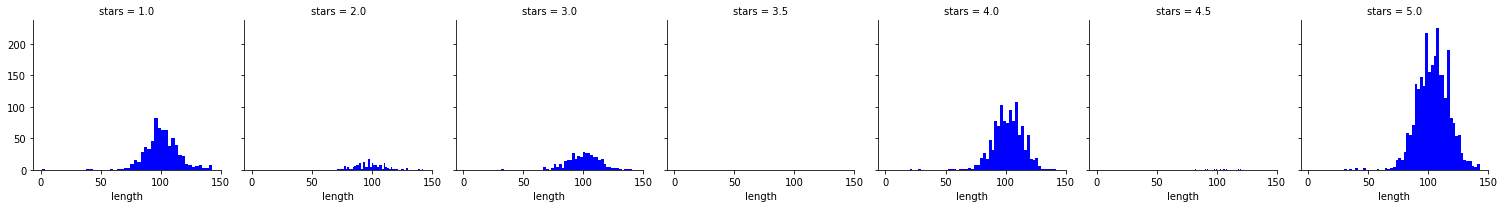

In [641]:
graph = sns.FacetGrid(data=df,col='stars')
graph.map(plt.hist,'length',bins=50,color='blue')

#### Removal of meaningless thing from text

In [642]:
def fun(x):
#     print(x)
    blob=TextBlob(x)
#     print("blob ",blob)
    verb=[]
    s=" "
    for word, tag in blob.tags:
#         print("ffff")
        if tag == 'RB' or tag=='RBR' or tag=='RBS' or tag=='JJ' or tag=='JJR':
            verb.append(word)
    s=s.join(verb)
    return s

In [643]:
def plot_word_cloud(data):
    '''
    Function to plot word cloud from a pandas series
    Input: data: pandas.core.series.Series object
    Output: Wordcloud of most recurrent words in data
        for plots to be in ipython notebook include following line before calling this function
        %matplotlib inline 
    '''
    # take relative word frequencies into account, lower max_font_size
    wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(str(data))
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [644]:
df

,stars,text,oneword,length
0,1.0,2,3,1
1,5.0,"5 minutes walk kankurgachi bus stop, primarily...",Insane!,114
2,1.0,cheap quality food. ordered food zomato. food ...,Avoid!,103
3,5.0,"name suggests, compact wholesome eatery locate...",Insane!,108
4,5.0,kankurgachi dhaba located 5-8min walking dista...,Insane!,112
5,5.0,kakurgachi dhaaba hidden gem located kankurgac...,Insane!,105
6,1.0,much poor service. asked bar menu 3 times got ...,Avoid!,80
7,5.0,great time family saturday lunch. huge spread ...,Insane!,99
8,5.0,sumana thanks. for. gr8 service highly oblige....,Insane!,101
9,3.0,...finally reviewing jw marriott ...it great h...,Average,118


In [645]:
df=df.reset_index()
df

,index,stars,text,oneword,length
0,0,1.0,2,3,1
1,1,5.0,"5 minutes walk kankurgachi bus stop, primarily...",Insane!,114
2,2,1.0,cheap quality food. ordered food zomato. food ...,Avoid!,103
3,3,5.0,"name suggests, compact wholesome eatery locate...",Insane!,108
4,4,5.0,kankurgachi dhaba located 5-8min walking dista...,Insane!,112
5,5,5.0,kakurgachi dhaaba hidden gem located kankurgac...,Insane!,105
6,6,1.0,much poor service. asked bar menu 3 times got ...,Avoid!,80
7,7,5.0,great time family saturday lunch. huge spread ...,Insane!,99
8,8,5.0,sumana thanks. for. gr8 service highly oblige....,Insane!,101
9,9,3.0,...finally reviewing jw marriott ...it great h...,Average,118


In [646]:
df=df.drop(['index'],axis=1)

In [647]:
df

,stars,text,oneword,length
0,1.0,2,3,1
1,5.0,"5 minutes walk kankurgachi bus stop, primarily...",Insane!,114
2,1.0,cheap quality food. ordered food zomato. food ...,Avoid!,103
3,5.0,"name suggests, compact wholesome eatery locate...",Insane!,108
4,5.0,kankurgachi dhaba located 5-8min walking dista...,Insane!,112
5,5.0,kakurgachi dhaaba hidden gem located kankurgac...,Insane!,105
6,1.0,much poor service. asked bar menu 3 times got ...,Avoid!,80
7,5.0,great time family saturday lunch. huge spread ...,Insane!,99
8,5.0,sumana thanks. for. gr8 service highly oblige....,Insane!,101
9,3.0,...finally reviewing jw marriott ...it great h...,Average,118


In [648]:
df['text'] = df['text'].apply(fun)

# strv=df.groupby('stars').mean()
# stval.corr()
# strv.mean('cool')
# strv

# strv.corr()

### STEMMING

In [649]:
df['text'] = df['text'].apply(lambda x:' '.join([stemmer.stem(word) for word in x.split() if word in stemmer.stem(word)]))

In [650]:
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [651]:
texts = df['text']
stars = df['stars']

In [652]:
print(len(texts))

5139


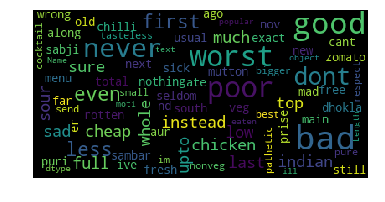

In [653]:
plot_word_cloud(df["text"].loc[df.stars == 1,])

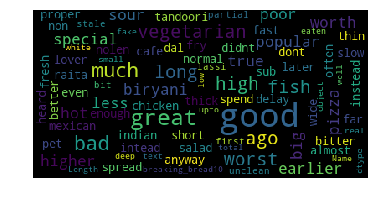

In [654]:
plot_word_cloud(df["text"].loc[df.stars == 2,])

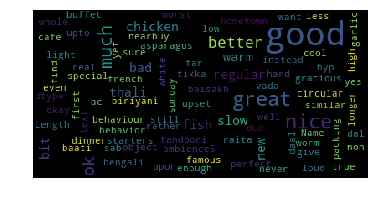

In [655]:
plot_word_cloud(df["text"].loc[df.stars == 3,])

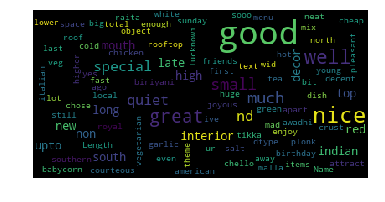

In [656]:
plot_word_cloud(df["text"].loc[df.stars == 4,])

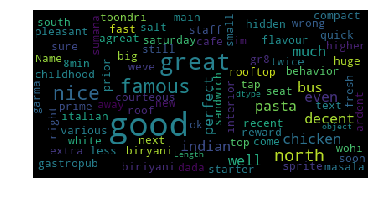

In [657]:
plot_word_cloud(df["text"].loc[df.stars == 5,])

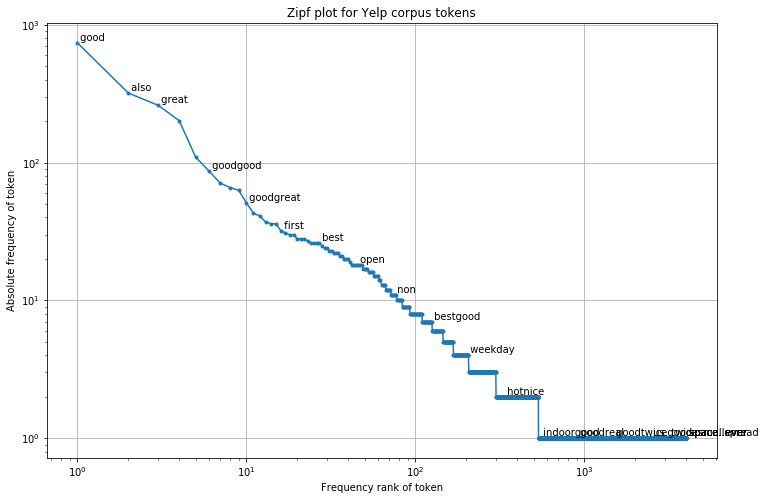

In [658]:
yelp_review_tokens = df.text.sum()
yelp_review_vocabulary = nltk.FreqDist(yelp_review_tokens.split())
yelp_review_vocabulary_counts = np.array(list(yelp_review_vocabulary.values()))
yelp_review_vocabulary_tokens = list(yelp_review_vocabulary.keys())

# A Zipf plot
ranks = np.arange(1, len(yelp_review_vocabulary_counts)+1)
indices = np.argsort(-yelp_review_vocabulary_counts)
frequencies = yelp_review_vocabulary_counts[indices]
fig3 = plt.figure(figsize=(12, 8))
plt.loglog(ranks, frequencies, marker=".")
plt.title("Zipf plot for Yelp corpus tokens")
plt.xlabel("Frequency rank of token")
plt.ylabel("Absolute frequency of token")
plt.grid(True)
for n in list(np.logspace(-0.5, np.log10(len(yelp_review_vocabulary_counts)), 20).astype(int)):
    dummy = plt.text(ranks[n-1], frequencies[n-1], " " + yelp_review_vocabulary_tokens[indices[n-1]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

In [659]:
dict1={}
dict1[1]=[]
dict1[2]=[]
dict1[3]=[]
dict1[4]=[]
dict1[5]=[]

In [660]:
nan_rows = df[df['stars'].isnull()]
nan_rows

,stars,text,oneword,length


In [661]:
df

,stars,text,oneword,length
0,1.0,,3,1
1,5.0,small north indian,Insane!,114
2,1.0,cheap low low also,Avoid!,103
3,5.0,compact north indian,Insane!,108
4,5.0,5-8min bus,Insane!,112
5,5.0,hidden much,Insane!,105
6,1.0,much poor menu next,Avoid!,80
7,5.0,great saturday huge,Insane!,99
8,5.0,sumana gr8 seat,Insane!,101
9,3.0,great hyp,Average,118


In [662]:
# df['stars']
nan_rows = df[df['stars'].isnull()]
nan_rows

,stars,text,oneword,length


In [663]:
df['stars']

0       1.0
1       5.0
2       1.0
3       5.0
4       5.0
5       5.0
6       1.0
7       5.0
8       5.0
9       3.0
10      3.0
11      5.0
12      5.0
13      3.0
14      5.0
15      5.0
16      5.0
17      3.0
18      5.0
19      5.0
20      1.0
21      4.0
22      4.0
23      4.0
24      5.0
25      4.0
26      5.0
27      5.0
28      2.0
29      3.0
       ... 
5109    4.0
5110    1.0
5111    4.0
5112    5.0
5113    5.0
5114    5.0
5115    5.0
5116    5.0
5117    5.0
5118    3.0
5119    4.0
5120    4.0
5121    1.0
5122    4.0
5123    1.0
5124    4.0
5125    4.0
5126    5.0
5127    1.0
5128    3.0
5129    5.0
5130    5.0
5131    1.0
5132    4.0
5133    1.0
5134    1.0
5135    5.0
5136    4.0
5137    4.0
5138    2.0
Name: stars, Length: 5139, dtype: float64

In [664]:
positive=0
negative=0
count=0
#polarity and star graph 

for i in df['text']:
    blob = TextBlob(i)
    feel = blob.sentiment
    if feel.polarity > 0:
        positive = positive + 1
    else:
        negative = negative + 1
    if(feel.polarity<0.10):
        df.loc[count, 'sentiment'] = int(1)
    elif(feel.polarity>=0.10 and feel.polarity < 0.16):
        df.loc[count, 'sentiment'] = int(2)
    elif(feel.polarity>=0.16 and feel.polarity < 0.025):
        df.loc[count, 'sentiment'] = int(3)
    elif(feel.polarity>=0.025 and feel.polarity < 0.35):
        df.loc[count, 'sentiment'] = int(4)
    else:
        df.loc[count, 'sentiment'] = int(5)
    w=df.loc[count, 'stars']
#     print(w)
    if w=='NaN':
        print(i)
    print(w,count)
    dict1[int(w)].append(feel.polarity)
    count=count+1

1.0 0
5.0 1
1.0 2
5.0 3
5.0 4
5.0 5
1.0 6
5.0 7
5.0 8
3.0 9
3.0 10
5.0 11
5.0 12
3.0 13
5.0 14
5.0 15
5.0 16
3.0 17
5.0 18
5.0 19
1.0 20
4.0 21
4.0 22
4.0 23
5.0 24
4.0 25
5.0 26
5.0 27
2.0 28
3.0 29
5.0 30
4.0 31
5.0 32
5.0 33
4.0 34
5.0 35
5.0 36
5.0 37
5.0 38
4.0 39
5.0 40
4.0 41
5.0 42
4.0 43
4.0 44
4.0 45
4.0 46
1.0 47
5.0 48
5.0 49
5.0 50
5.0 51
5.0 52
5.0 53
5.0 54
4.0 55
4.0 56
5.0 57
5.0 58
5.0 59
5.0 60
5.0 61
4.5 62
5.0 63
5.0 64
5.0 65
5.0 66
4.0 67
2.0 68
5.0 69
4.0 70
5.0 71
5.0 72
5.0 73
5.0 74
3.0 75
5.0 76
3.0 77
4.0 78
5.0 79
1.0 80
1.0 81
1.0 82
1.0 83
4.0 84
1.0 85
5.0 86
2.0 87
5.0 88
4.0 89
3.0 90
4.0 91
5.0 92
1.0 93
1.0 94
4.0 95
5.0 96
4.0 97
4.0 98
4.0 99
5.0 100
4.0 101
3.0 102
5.0 103
5.0 104
4.0 105
4.0 106
1.0 107
1.0 108
3.0 109
4.0 110
3.0 111
3.0 112
3.0 113
5.0 114
4.0 115
5.0 116
5.0 117
5.0 118
5.0 119
4.0 120
5.0 121
4.0 122
4.0 123
4.0 124
5.0 125
5.0 126
4.0 127
5.0 128
5.0 129
5.0 130
5.0 131
5.0 132
5.0 133
5.0 134
5.0 135
5.0 136
4.0 137
4.0 13

5.0 1076
4.0 1077
5.0 1078
5.0 1079
5.0 1080
5.0 1081
4.0 1082
4.5 1083
4.0 1084
4.0 1085
4.0 1086
5.0 1087
5.0 1088
5.0 1089
5.0 1090
5.0 1091
4.0 1092
4.0 1093
4.0 1094
5.0 1095
5.0 1096
5.0 1097
5.0 1098
5.0 1099
5.0 1100
5.0 1101
5.0 1102
3.0 1103
5.0 1104
5.0 1105
4.0 1106
5.0 1107
5.0 1108
2.0 1109
5.0 1110
5.0 1111
4.0 1112
5.0 1113
5.0 1114
5.0 1115
1.0 1116
5.0 1117
5.0 1118
5.0 1119
5.0 1120
5.0 1121
4.0 1122
5.0 1123
4.0 1124
5.0 1125
5.0 1126
5.0 1127
2.0 1128
1.0 1129
5.0 1130
5.0 1131
5.0 1132
5.0 1133
5.0 1134
5.0 1135
5.0 1136
5.0 1137
4.0 1138
5.0 1139
5.0 1140
5.0 1141
5.0 1142
5.0 1143
5.0 1144
5.0 1145
5.0 1146
5.0 1147
5.0 1148
4.0 1149
5.0 1150
5.0 1151
5.0 1152
5.0 1153
5.0 1154
5.0 1155
5.0 1156
5.0 1157
5.0 1158
5.0 1159
5.0 1160
5.0 1161
4.0 1162
5.0 1163
1.0 1164
5.0 1165
5.0 1166
4.0 1167
4.0 1168
4.0 1169
5.0 1170
3.0 1171
3.0 1172
4.0 1173
5.0 1174
4.0 1175
5.0 1176
4.0 1177
5.0 1178
5.0 1179
5.0 1180
5.0 1181
5.0 1182
5.0 1183
4.0 1184
5.0 1185
5.0 1186
5

5.0 2014
4.0 2015
4.0 2016
4.0 2017
4.0 2018
5.0 2019
5.0 2020
3.0 2021
5.0 2022
5.0 2023
5.0 2024
4.0 2025
4.0 2026
5.0 2027
1.0 2028
5.0 2029
4.0 2030
5.0 2031
5.0 2032
5.0 2033
5.0 2034
5.0 2035
5.0 2036
5.0 2037
4.0 2038
1.0 2039
1.0 2040
3.0 2041
2.0 2042
5.0 2043
4.0 2044
1.0 2045
5.0 2046
3.0 2047
5.0 2048
4.0 2049
5.0 2050
5.0 2051
4.0 2052
5.0 2053
5.0 2054
5.0 2055
5.0 2056
5.0 2057
3.0 2058
5.0 2059
5.0 2060
5.0 2061
5.0 2062
4.0 2063
5.0 2064
5.0 2065
5.0 2066
5.0 2067
5.0 2068
5.0 2069
5.0 2070
5.0 2071
5.0 2072
5.0 2073
5.0 2074
5.0 2075
1.0 2076
1.0 2077
1.0 2078
5.0 2079
5.0 2080
5.0 2081
5.0 2082
5.0 2083
5.0 2084
5.0 2085
5.0 2086
4.0 2087
5.0 2088
5.0 2089
4.0 2090
5.0 2091
5.0 2092
5.0 2093
5.0 2094
4.0 2095
1.0 2096
4.0 2097
5.0 2098
5.0 2099
5.0 2100
5.0 2101
5.0 2102
5.0 2103
5.0 2104
4.0 2105
5.0 2106
5.0 2107
5.0 2108
5.0 2109
3.0 2110
3.0 2111
4.0 2112
5.0 2113
5.0 2114
5.0 2115
5.0 2116
5.0 2117
5.0 2118
5.0 2119
5.0 2120
5.0 2121
5.0 2122
5.0 2123
5.0 2124
5

5.0 3028
5.0 3029
5.0 3030
5.0 3031
5.0 3032
5.0 3033
4.0 3034
3.0 3035
5.0 3036
5.0 3037
5.0 3038
5.0 3039
5.0 3040
5.0 3041
5.0 3042
5.0 3043
5.0 3044
5.0 3045
3.0 3046
5.0 3047
4.0 3048
5.0 3049
1.0 3050
2.0 3051
5.0 3052
4.0 3053
4.0 3054
5.0 3055
5.0 3056
5.0 3057
5.0 3058
5.0 3059
5.0 3060
2.0 3061
4.0 3062
4.0 3063
4.0 3064
5.0 3065
4.0 3066
5.0 3067
5.0 3068
3.0 3069
4.0 3070
5.0 3071
4.0 3072
5.0 3073
5.0 3074
5.0 3075
5.0 3076
4.0 3077
5.0 3078
5.0 3079
4.0 3080
5.0 3081
1.0 3082
5.0 3083
5.0 3084
4.0 3085
5.0 3086
5.0 3087
3.0 3088
5.0 3089
5.0 3090
5.0 3091
5.0 3092
5.0 3093
5.0 3094
5.0 3095
5.0 3096
5.0 3097
5.0 3098
5.0 3099
5.0 3100
5.0 3101
3.0 3102
5.0 3103
5.0 3104
5.0 3105
5.0 3106
5.0 3107
5.0 3108
5.0 3109
5.0 3110
4.0 3111
4.0 3112
5.0 3113
5.0 3114
5.0 3115
5.0 3116
5.0 3117
5.0 3118
5.0 3119
5.0 3120
5.0 3121
4.0 3122
5.0 3123
4.0 3124
5.0 3125
5.0 3126
5.0 3127
5.0 3128
5.0 3129
5.0 3130
4.0 3131
5.0 3132
4.0 3133
5.0 3134
5.0 3135
4.0 3136
4.0 3137
5.0 3138
5

1.0 3958
1.0 3959
1.0 3960
4.0 3961
5.0 3962
5.0 3963
5.0 3964
5.0 3965
4.0 3966
1.0 3967
5.0 3968
5.0 3969
4.0 3970
5.0 3971
5.0 3972
1.0 3973
5.0 3974
3.0 3975
1.0 3976
1.0 3977
4.0 3978
4.0 3979
4.0 3980
4.0 3981
3.0 3982
4.0 3983
4.0 3984
4.0 3985
4.0 3986
4.0 3987
5.0 3988
5.0 3989
5.0 3990
1.0 3991
5.0 3992
4.0 3993
5.0 3994
5.0 3995
3.0 3996
5.0 3997
4.0 3998
4.0 3999
5.0 4000
1.0 4001
2.0 4002
5.0 4003
1.0 4004
3.0 4005
1.0 4006
5.0 4007
4.0 4008
1.0 4009
1.0 4010
1.0 4011
5.0 4012
1.0 4013
1.0 4014
1.0 4015
2.0 4016
1.0 4017
1.0 4018
4.0 4019
1.0 4020
3.0 4021
1.0 4022
3.0 4023
4.0 4024
2.0 4025
2.0 4026
5.0 4027
1.0 4028
5.0 4029
5.0 4030
4.0 4031
5.0 4032
5.0 4033
5.0 4034
4.0 4035
5.0 4036
4.0 4037
5.0 4038
2.0 4039
3.0 4040
4.0 4041
5.0 4042
1.0 4043
5.0 4044
5.0 4045
5.0 4046
1.0 4047
1.0 4048
4.0 4049
1.0 4050
1.0 4051
5.0 4052
5.0 4053
5.0 4054
5.0 4055
4.0 4056
2.0 4057
1.0 4058
4.0 4059
4.0 4060
3.0 4061
1.0 4062
1.0 4063
4.0 4064
5.0 4065
4.0 4066
4.0 4067
1.0 4068
1

1.0 4969
1.0 4970
4.0 4971
4.0 4972
2.0 4973
1.0 4974
5.0 4975
1.0 4976
2.0 4977
1.0 4978
5.0 4979
1.0 4980
1.0 4981
4.0 4982
1.0 4983
5.0 4984
1.0 4985
5.0 4986
4.0 4987
4.0 4988
5.0 4989
4.0 4990
5.0 4991
5.0 4992
4.0 4993
5.0 4994
5.0 4995
1.0 4996
4.0 4997
1.0 4998
1.0 4999
1.0 5000
5.0 5001
1.0 5002
1.0 5003
2.0 5004
5.0 5005
3.0 5006
5.0 5007
5.0 5008
3.0 5009
5.0 5010
4.0 5011
5.0 5012
5.0 5013
1.0 5014
5.0 5015
4.0 5016
4.0 5017
1.0 5018
1.0 5019
5.0 5020
4.0 5021
3.0 5022
4.0 5023
5.0 5024
5.0 5025
1.0 5026
2.0 5027
4.0 5028
1.0 5029
3.0 5030
4.0 5031
1.0 5032
5.0 5033
5.0 5034
5.0 5035
4.0 5036
5.0 5037
3.0 5038
3.0 5039
5.0 5040
3.0 5041
5.0 5042
5.0 5043
5.0 5044
1.0 5045
1.0 5046
4.0 5047
4.0 5048
4.0 5049
4.0 5050
4.0 5051
4.0 5052
5.0 5053
5.0 5054
4.0 5055
3.0 5056
5.0 5057
5.0 5058
5.0 5059
3.0 5060
3.0 5061
5.0 5062
5.0 5063
5.0 5064
5.0 5065
3.0 5066
5.0 5067
4.0 5068
1.0 5069
5.0 5070
4.0 5071
5.0 5072
4.0 5073
4.0 5074
3.0 5075
5.0 5076
4.0 5077
4.0 5078
4.0 5079
4

In [665]:
nan_rows = df[df['stars'].isnull()]
nan_rows

,stars,text,oneword,length,sentiment


In [666]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5]
y = list(dict1.values())
y

[[0.0,
  0.13333333333333333,
  -0.2,
  0.0,
  0.0,
  0.0,
  3.700743415417188e-17,
  0.5,
  -0.15000000000000002,
  0.0,
  0.09999999999999999,
  -0.625,
  0.13636363636363635,
  0.0,
  0.13333333333333333,
  0.0,
  -0.25,
  0.0,
  -0.5999999999999999,
  0.5,
  0.0,
  -0.6999999999999998,
  0.7,
  0.0,
  0.0,
  0.0,
  0.7,
  0.3,
  0.1,
  -0.8499999999999999,
  0.4000000000000001,
  -0.125,
  0.0,
  -0.16428571428571426,
  0.1,
  -0.15,
  -0.4,
  -0.25,
  -0.6,
  -0.6999999999999998,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.6999999999999998,
  0.4,
  0.0,
  0.0,
  0.5,
  -0.5,
  4.4408920985006264e-17,
  0.0,
  0.425,
  0.0,
  0.6,
  -0.4,
  0.0,
  0.0,
  -0.25,
  -0.16666666666666666,
  -0.2916666666666667,
  0.14999999999999997,
  0.0,
  0.8,
  -0.22222222222222218,
  -0.6999999999999998,
  0.0,
  0.35,
  -1.0,
  0.0,
  -0.6999999999999998,
  0.0,
  0.7,
  0.0,
  -0.6,
  -0.15000000000000002,
  0.05333333333333334,
  0.0,
  0.0,
  0.0,
  0.0,
  -0.25,
  0.7,
  5.551115123125783e-17,
  0.0,


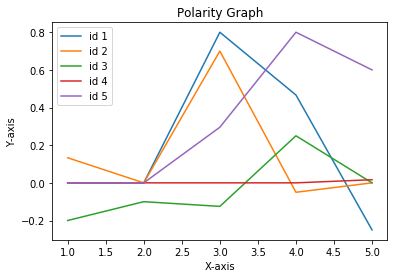

In [667]:
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Polarity Graph")
for i in range(len(y)):
    plt.plot(x,[pt[i] for pt in y],label = 'id %s'%(i+1))
plt.legend()
plt.show()

#### REASON FOR BALANCING CAN BE SEEN BY GRAPH SHOWING VARIATION IN COLLECTION OF RATING COUNT ###$

In [668]:
# stars_1 = df[df['stars']==1]
# stars_2 = df[df['stars']==2]
# stars_3 = df[df['stars']==3]
# stars_5 = df[df['stars']==5]
# stars_4 = df[df['stars']==4]

# df_minority_upsampled_1 = resample(stars_1, 
#                                  replace=True, 
#                                  n_samples=3526,
#                                  random_state=123)
# df_minority_upsampled_2 = resample(stars_2, 
#                                  replace=True, 
#                                  n_samples=3526,
#                                  random_state=123)
# df_minority_upsampled_3 = resample(stars_3, 
#                                  replace=True, 
#                                  n_samples=3526,
#                                  random_state=123)
# df_minority_upsampled_5 = resample(stars_5, 
#                                  replace=True, 
#                                  n_samples=3526,
#                                  random_state=123)
# df_upsampled = pd.concat([stars_4, df_minority_upsampled_1,df_minority_upsampled_2,df_minority_upsampled_3,df_minority_upsampled_5])

we’ll get less biased predictions if we train the system on balanced data. This means that ideally we should have the same number of examples of each review type.

In [669]:
# N_star_categories = 5
# colors = np.array(['#660000', '#ff4d4d', '#ffb3b3', '#99e699', '#29a329'])
# stars_labels = np.array(range(N_star_categories)) + 1;
# #star_category_dist_fig = plt.figure(figsize=(12,8))
# bar_plot_indices = np.arange(N_star_categories) 
# star_category_absolute_frequencies = df_upsampled.stars.value_counts(ascending=True);
# star_category_relative_frequencies = np.array(star_category_absolute_frequencies)/float(sum(star_category_absolute_frequencies))
# sns.set()
# sns.set(style="white")
# fig2 = plt.figure(figsize=(12, 8))
# ax = sns.barplot(x=bar_plot_indices + 1, y=star_category_relative_frequencies)
# ax.set_xlabel('Star Category');
# ax.set_ylabel('Relative Frequency');
# ax.set_title('Star Category Distribution for {0} Reviews'.format(len(df_upsampled)));

In [670]:
stars = df['stars']
print(Counter(stars))
balanced_y = stars
balanced_x = df['text']

Counter({5.0: 2736, 4.0: 1131, 1.0: 691, 3.0: 379, 2.0: 186, 4.5: 15, 3.5: 1})


In [671]:
# df_upsampled
# df_upsampled.reset_index()

balanced_y=df['stars'].round(0).astype(int)

### Data bais

In [672]:
# bow_transformer = CountVectorizer(analyzer=text_process).fit(X_train)
# df_upsampled = df_upsampled.loc[:,~df_upsampled.columns.duplicated()]

In [673]:
# df_upsampled
# df_upsampled.reset_index()

In [674]:
df2=df[['sentiment','text','stars','oneword']]


In [675]:
df2

,sentiment,text,stars,oneword
0,1.0,,1.0,3
1,1.0,small north indian,5.0,Insane!
2,2.0,cheap low low also,1.0,Avoid!
3,1.0,compact north indian,5.0,Insane!
4,1.0,5-8min bus,5.0,Insane!
5,1.0,hidden much,5.0,Insane!
6,1.0,much poor menu next,1.0,Avoid!
7,5.0,great saturday huge,5.0,Insane!
8,1.0,sumana gr8 seat,5.0,Insane!
9,5.0,great hyp,3.0,Average


In [676]:
# df2.groupby('stars', as_index=False)['sentiment'].mean()

In [677]:
positive

3200

In [678]:
negative

1939

### TF-IDF ###
### This vectorizer breaks text into single words and bi-grams and then calculates the TF-IDF representation

In [679]:
# vectorizer = TfidfVectorizer(ngram_range=(1,2))
# vectors = vectorizer.fit_transform(balanced_x)
# balanced_x.shape

In [680]:
# print(vectors)
# print(vectors.shape[0])
# print(vectors.shape[1])
df2=df2.drop(['stars'],axis=1)

In [681]:
X_train, X_test, y_train, y_test = train_test_split(df2,balanced_y, test_size=0.20, random_state=42)
X_train1=copy.deepcopy(X_train)
y_train1=copy.deepcopy(y_train)

In [682]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import FunctionTransformer

from sklearn.preprocessing import FunctionTransformer
get_text_data = FunctionTransformer(lambda x: x['text'], validate=False)
# get_text1_data=FunctionTransformer(lambda x: x['oneword'], validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[['sentiment']], validate=False)

just_text_data = get_text_data.fit_transform(X_train)
just_numeric_data = get_numeric_data.fit_transform(X_train)
# just_text1_data=get_text1_data.fit_transform(X_train)
# Print head to check results
print('Text Data')
print(just_text_data.head())
print('\nNumeric Data')
print(just_numeric_data.head())

Text Data
2194                          
1943    ama oreo cold tiramisu
2688                          
949                           
1221     chose wasnt good much
Name: text, dtype: object

Numeric Data
      sentiment
2194        1.0
1943        1.0
2688        1.0
949         1.0
1221        5.0


In [683]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn import LogisticRegression
process_and_join_features = FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
#                     ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
#         ,
#                 ('text1_features', Pipeline([
#                     ('selector', get_text1_data),
#                     ('vectorizer', CountVectorizer())
# #                     ('imputer', Imputer())
#                 ]))
             ]
        )

# Instantiate nested pipeline: pl
pl = Pipeline([
        ('union', process_and_join_features),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

# pl1 = Pipeline([
#         ('union', process_and_join_features),
#         ('clf',MLPClassifier(hidden_layer_sizes=(5,5), max_iter=50, alpha=0.0001,
#                      solver='sgd', verbose=10,  random_state=21,tol=0.000000001))
#     ])
pl2 = Pipeline([
        ('union', process_and_join_features),
        ('clf', MultinomialNB())
    ])
# pl3 = Pipeline([
#         ('union', process_and_join_features),
#         ('clf', OneVsRestClassifier(LogisticRegression()))
#     ])
# pl4 = Pipeline([
#         ('union', process_and_join_features),
#         ('clf', OneVsRestClassifier(LogisticRegression()))
#     ])
# # Fit pl to the training data

In [684]:
X_train

,sentiment,text,oneword
2194,1.0,,Insane!
1943,1.0,ama oreo cold tiramisu,Insane!
2688,1.0,,Great!
949,1.0,,Avoid!
1221,5.0,chose wasnt good much,Avoid!
19,1.0,away,Insane!
1454,1.0,bangalore..vapour,Great!
668,1.0,wish,Avoid!
218,1.0,fish,Average
2303,5.0,great mr. good,Insane!


In [685]:
y_train

2194    5
1943    5
2688    4
949     1
1221    1
19      5
1454    4
668     1
218     3
2303    5
5044    5
3482    4
3635    4
3591    4
2357    4
3944    5
3248    1
1018    5
2380    5
2841    5
517     4
1672    3
1580    1
5114    5
3830    1
1620    5
3433    5
4568    5
2492    5
4562    4
       ..
3005    2
2734    5
189     4
1806    2
975     5
2747    1
2047    3
2558    4
1082    4
474     4
2904    5
4843    5
4117    1
3385    5
4555    4
1184    4
5051    4
2433    4
2391    5
769     5
1685    5
130     5
2919    5
3171    4
3444    1
4426    5
466     5
3092    5
3772    4
860     5
Name: stars, Length: 4111, dtype: int64

In [686]:
print(type(y_train))

<class 'pandas.core.series.Series'>


In [687]:
pl.fit(X_train, y_train)

# Compute and print accuracy

/home/dhawal/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('union', FeatureUnion(n_jobs=None,
       transformer_list=[('numeric_features', Pipeline(memory=None,
     steps=[('selector', FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function <lambda> at 0x7f2ac4aa2378>, inv_kw_args=None,
          inverse_func=None, kw...te=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None))])

In [688]:
X_test

,sentiment,text,oneword
838,1.0,,Avoid!
977,4.0,good low due fewer,Average
3986,4.0,pure marashtrian decent,Great!
798,1.0,abhiman forward,Insane!
2042,1.0,n green,Blah!
4638,1.0,ask extra extra old,Avoid!
2943,5.0,great fish nice,Insane!
2815,5.0,good good nice .just,Great!
553,1.0,well kool big artist,Insane!
4028,1.0,,Avoid!


In [689]:
y_test1 = pl.predict(X_test)

In [690]:
print(y_test1)
print(len(y_test1))

[5 5 4 ... 5 5 5]
1028


In [691]:
# accuracy = pl.score(y_test1, y_test)
# print("\nAccuracy on sample data - all data: ", accuracy)

In [692]:
y_test
print(len(y_test))

1028


In [693]:
y_test
print(accuracy_score(y_test,y_test1))

0.5632295719844358


In [694]:
# from sklearn.pipeline import Pipeline, FeatureUnion

# pipeline = Pipeline([
#     ('feats', FeatureUnion([
#         ('ngram', ngram_count_pipeline), # can pass in either a pipeline
#         ('ave', AverageWordLengthExtractor()) # or a transformer
#     ])),
#     ('clf', LinearSVC())  # classifier
# ])

In [695]:
# pl1.fit(X_train, y_train)
# y_test2 = pl.predict(X_test)
# print(accuracy_score(y_test,y_test2))

In [ ]:
pl2.fit(X_train, y_train)

In [702]:
y_test3 = pl2.predict(X_test)
print(accuracy_score(y_test,y_test3))

0.5768482490272373


### Linear SVC

In [697]:
# classifier = LinearSVC()
# classifier.fit(X_train, y_train)

In [698]:
# preds = classifier.predict(X_test)
# print(list(preds[:10]))
# print(y_test[:10])

In [699]:
# print(accuracy_score(y_test, preds))

In [700]:
# confusion_matrix(y_test, preds)

### NN

In [701]:
from sklearn.neural_network import MLPClassifier 
clf = MLPClassifier(hidden_layer_sizes=(5,5), max_iter=50, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
clf.fit(X_train1, y_train1)
y_pred2 = clf.predict(X_test)

ValueError: could not convert string to float: 

In [ ]:
print(accuracy_score(y_test, y_pred2)*100)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X_train1, y_train1)
predmnb = mnb.predict(X_test)

In [ ]:
print("Confusion Matrix for Multinomial Naive Bayes:")
print(confusion_matrix(y_test,predmnb))
print("Score:",round(accuracy_score(y_test,predmnb)*100,2))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

#Boosting
gbi = GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=999999)
gbi.fit(X_train, y_train)
predgbi = gbi.predict(X_test)

In [ ]:
print("Confusion Matrix for Gradient Boosting Classifier:")
print(confusion_matrix(y_test,predgbi))
print("Score:",round(accuracy_score(y_test,predgbi)*100,2))
# print("Classification Report:",classification_report(y_test,predgbi))

### Logistic

In [ ]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X_train, y_train)
y_test1=clf.predict(X_test)


In [ ]:
y_test

In [ ]:
print(accuracy_score(y_test, y_test1)*100)

### NAIVE BAYES

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train.toarray(),y_train)

In [ ]:
predicted= model.predict(X_test.toarray())

In [ ]:
print(accuracy_score(y_test, predicted)*100)